# 1) Business Understanding

In [ ]:
  """ 
  This project aims to answer four questions: 
    1 - What are the busiest times of the year to visit Seattle?
    2 - Do the holydays influence the AirBnB availability?
    3 - What is the relationship between prices and availability?
    4 - Does the review variables influence price?
 
 For this goal the dataset will be explored considering 3 basic views: df_reviews, df_listings and df_calendar.
 
 The data will be gathered, assessed and properly explored so the basic relationships can be understood.
 
 Questions 1 to 3 will be answered using the df_calendar data because it contains the relationship between time, availability and price.
 The high level goal is to create views/time series of the data grouped by date. Then, the time series are plotted so we can visually understand the relationship between the variables. 
 
 Question 4 will use df_listings data because it contains the relationship between the review variables and price.
 The goal is to create correlation matrices to understand by how much the review variables are correlated to price. 
 

  """

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import missingno as msno
from pylab import rcParams

# Gathering Data

In [2]:
# Function to convert string format to datetime

dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# df = pd.read_csv('calendar.csv', parse_dates = ['date'], data_parser = data_parse)

In [274]:
# Importing/gathering the data

df_reviews = pd.read_csv('reviews.csv')df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv', parse_dates = ['date'], date_parser = dataparse)

<ipython-input-2-d2adc9cbe902>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


# 2) Data Understanding

# Assessing data

In [4]:
# Reviews dataset

In [5]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
df_reviews.shape

(84849, 6)

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [8]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [9]:
# Listings dataset

In [10]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [11]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [12]:
df_listings.shape

(3818, 92)

In [13]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [14]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [15]:
# Calendar dataset

In [16]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [17]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


In [18]:
# Finding unique values in the available column

df_calendar['available'].unique()

array(['t', 'f'], dtype=object)

In [19]:
df_calendar.shape

(1393570, 4)

In [20]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 42.5+ MB


In [21]:
df_calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


# Question 1: What are the busiest times of the year to visit Seattle?

In [22]:
# The most suitable dataset to answer this question is df_calendar
# i.e. df_calendar contains the relationship between date and availability

In [23]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# 3) Data Preparation

# Analyzing and Cleaning Data

In [24]:
# Analysing missing values and cleaning missing data

In [25]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [26]:
import missingno as msno

<AxesSubplot:>

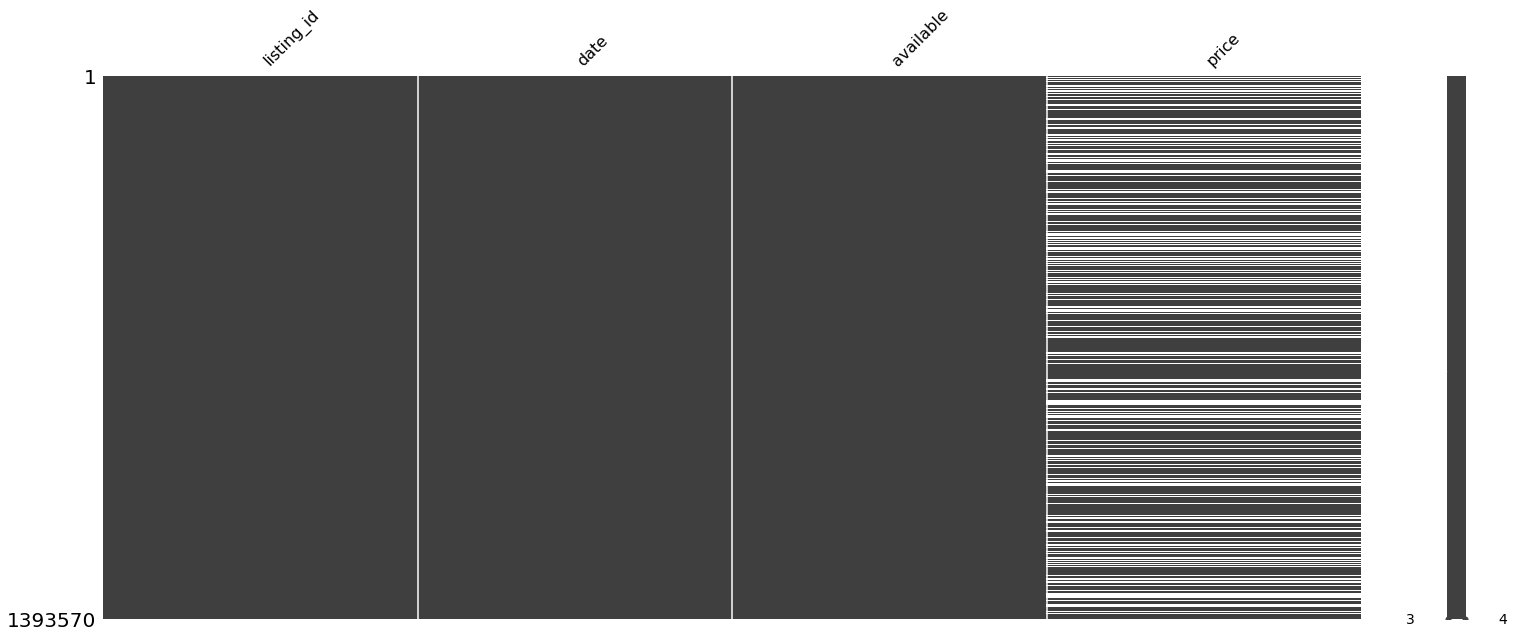

In [27]:
msno.matrix(df_calendar)

In [28]:
# For the fist question we are interested in the relationship between the variables 'date' and 'available' - These columns have no missing values

In [29]:
# The idea is to group the available and unavailable data considering dates
# The chosen strategy consists in converting 't' and 'f' to the integer value of 1
# The df_calendar dataset was split in 2 main datasets

In [275]:
def selector(data, field, label):
    
    """ 
  Summary line. 

  Function allows the creation of a new dataset based on a filter. 

  Parameters: 
  data: Dataset to be filtered
  field: Field in which the filter will be based 
  label (string): Label on which the filter will be based

  Returns: 
  data_2: dataset filtered 

    """  
   
    data_2 = data[data[field] == label]
    return data_2   

In [276]:
df_calendar_available = selector(df_calendar, 'available', 't')
df_calendar_available.shape

(934542, 4)

In [277]:
df_calendar_unavailable = selector(df_calendar, 'available', 'f')
df_calendar_unavailable.shape

(459028, 4)

In [ ]:
# Converting both 't' and 'f' from the 'available' column to 1
# The idea is to represent a record as one. This way we will be able so sum values of availability and unavailabity according to a particular date

In [278]:
val_mapping = {
    't':1
}

df_calendar_available['available'] = df_calendar_available['available'].map(val_mapping)

<ipython-input-278-66cca3f5e121>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_available['available'] = df_calendar_available['available'].map(val_mapping)


In [279]:
val_mapping = {
    'f':1
}

df_calendar_unavailable['available'] = df_calendar_unavailable['available'].map(val_mapping)

<ipython-input-279-e173a0f3e4c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_unavailable['available'] = df_calendar_unavailable['available'].map(val_mapping)


In [280]:
df_calendar_available.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
9,241032,2016-01-13,1,$85.00
10,241032,2016-01-14,1,$85.00
14,241032,2016-01-18,1,$85.00


In [281]:
df_calendar_unavailable.head()

,listing_id,date,available,price
2,241032,2016-01-06,1,NaN
3,241032,2016-01-07,1,NaN
4,241032,2016-01-08,1,NaN
5,241032,2016-01-09,1,NaN
6,241032,2016-01-10,1,NaN


In [242]:
# The 'listing_id' column will have no use for this analysis 
# We want to look at the relationship between availability and time

In [282]:
df_calendar_available.drop(['listing_id'], inplace = True, axis=1)

C:\Users\crdea\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [283]:
df_calendar_unavailable.drop(['listing_id'], inplace = True,axis=1)

In [284]:
# Grouping the data considering the 'date' field

In [288]:
def grouper(data, field):
    
    """ 
  Summary line. 

  Function groups data according to a particular field. 

  Parameters: 
  data: Data to be grouped using a particular field
  field (string): Field used to group the data

  Returns: 
  data_grouped: Dataset with grouped data 

    """  
    data_grouped  = data.groupby(['date']).sum()
    return data_grouped

In [285]:
df_calendar_available_group = grouper(df_calendar_available, 'date')

In [286]:
df_calendar_available_group.head()

,available
date,
2016-01-04,1735
2016-01-05,1867
2016-01-06,1826
2016-01-07,1776
2016-01-08,1782


In [248]:
# The 'date' field was converted to an index. The field 'date_1' was created so the date in this field can be properly used

df_calendar_available_group['date_1'] = pd.to_datetime(df_calendar_available_group.index)
df_calendar_available_group.head()

,available,date_1
date,,
2016-01-04,1735,2016-01-04
2016-01-05,1867,2016-01-05
2016-01-06,1826,2016-01-06
2016-01-07,1776,2016-01-07
2016-01-08,1782,2016-01-08


In [249]:
df_calendar_available_group.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2016-01-04 to 2017-01-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   available  365 non-null    int64         
 1   date_1     365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [250]:
# Repeating the process for df_unavailable

In [289]:
df_calendar_unavailable_group = grouper(df_calendar_unavailable, 'date')
df_calendar_unavailable_group.head()

,available
date,
2016-01-04,2083
2016-01-05,1951
2016-01-06,1992
2016-01-07,2042
2016-01-08,2036


In [252]:
df_calendar_unavailable_group['date_1'] = pd.to_datetime(df_calendar_unavailable_group.index)
df_calendar_unavailable_group.head()

,available,date_1
date,,
2016-01-04,2083,2016-01-04
2016-01-05,1951,2016-01-05
2016-01-06,1992,2016-01-06
2016-01-07,2042,2016-01-07
2016-01-08,2036,2016-01-08


In [253]:
df_calendar_unavailable_group.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2016-01-04 to 2017-01-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   available  365 non-null    int64         
 1   date_1     365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


# 4/5 Modeling and Evaluation

# Visualizing Results

In [95]:
# Function to visualize results in one time series
 
def result_visualization(series, title, x_label, y_label):
    
    """ 
  Summary line. 

  Function allows the visualization of one time series. 

  Parameters: 
  series (index, int): Time series variable with dates in datetime index format (independent variable) and int for dependent variables
  title (string): Title of figure
  x_label (string): Label of independent variable
  y_label (string): Label of dependent variable

  Returns: 
  Figure plot with specified parameters 

    """  

    rcParams['figure.figsize'] = 25, 10
    plt.rcParams.update({'font.size': 22})
    plt.plot(series)
    plt.title(title)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show(True)

In [68]:
# Drop 'date_1' field in order to plot the time series data

df_calendar_unavailable_group_1 = df_calendar_unavailable_group.drop(['date_1'], axis=1)

In [69]:
df_calendar_unavailable_group_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2016-01-04 to 2017-01-02
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   available  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


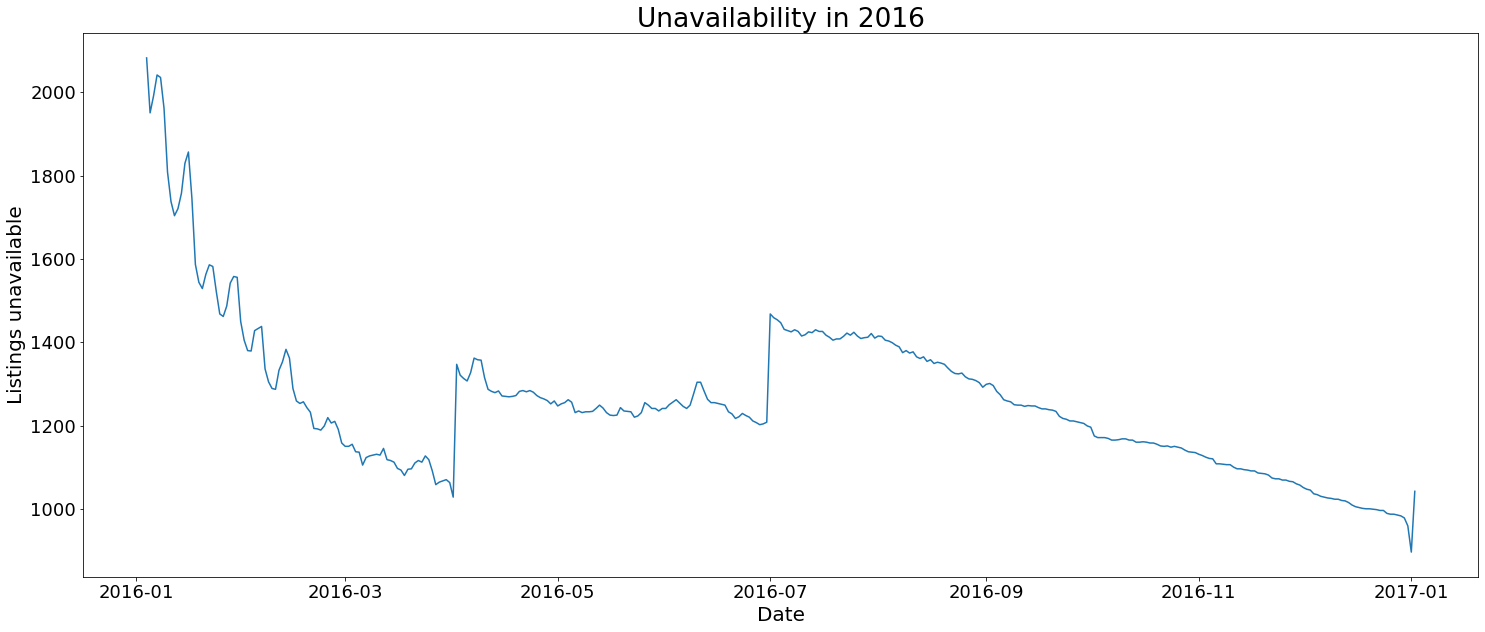

In [96]:
result_visualization(series = df_calendar_unavailable_group_1, title='Unavailability in 2016', x_label='Date', y_label='Listings unavailable')

In [73]:
# Drop 'date_1' field in order to plot the time series data

df_calendar_available_group_1 = df_calendar_available_group.drop(['date_1'], axis=1)

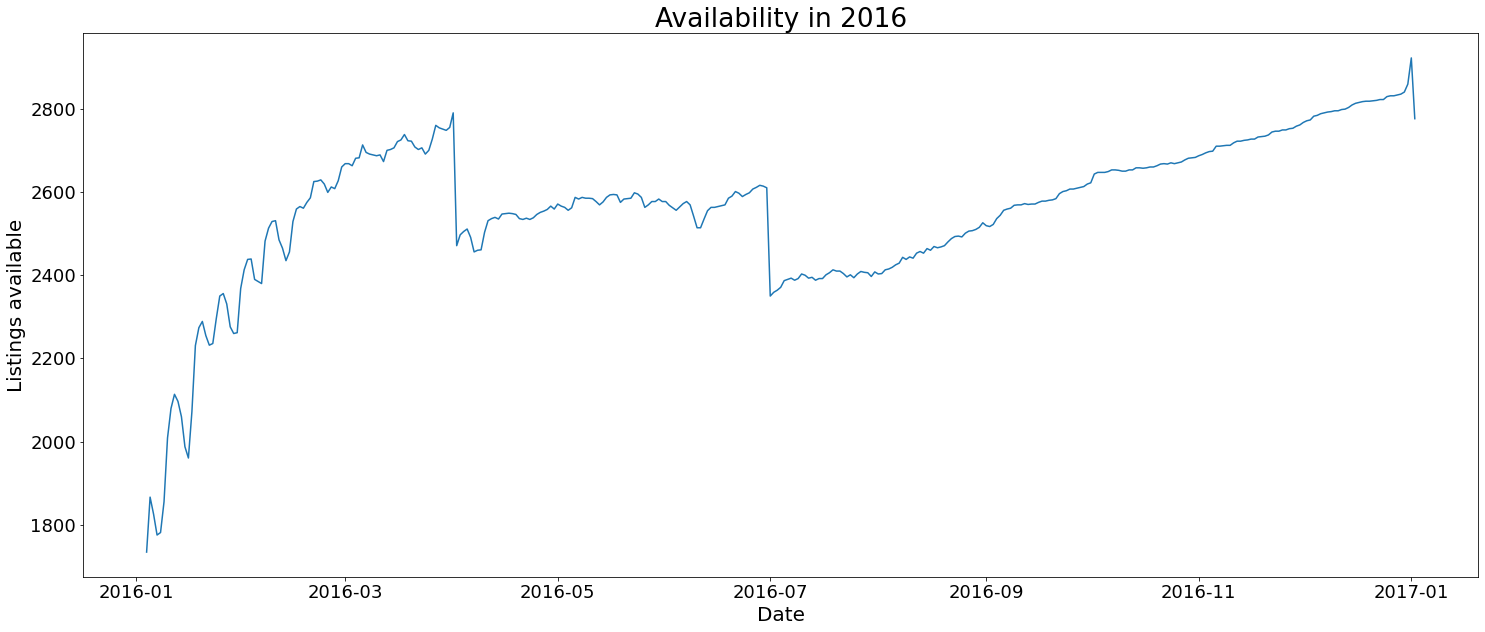

In [74]:
result_visualization(series = df_calendar_available_group_1, title='Availability in 2016', x_label='Date', y_label='Listings available')

In [94]:
# Function to visualize results in two time series
 
def result_vis_multiple_series(series_1, series_2, title, x_label, y_label):
    
    """ 
  Summary line. 

  Function allows the visualization of one time series. 

  Parameters: 
  series_1 (index, int): First time series variable with dates in datetime index format (independent variable) and int for dependent variables
  series_2 (index, int): Second time series variable with dates in datetime index format (independent variable) and int for dependent variables
  title (string): Title of figure
  x_label (string): Label of independent variable
  y_label (string): Label of dependent variable

  Returns: 
  Figure plot with specified parameters 
    """  
    rcParams['figure.figsize'] = 25, 10
    plt.rcParams.update({'font.size': 22})
    plt.plot(series_1)
    plt.plot(series_2)
    plt.title(title)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show(True)  

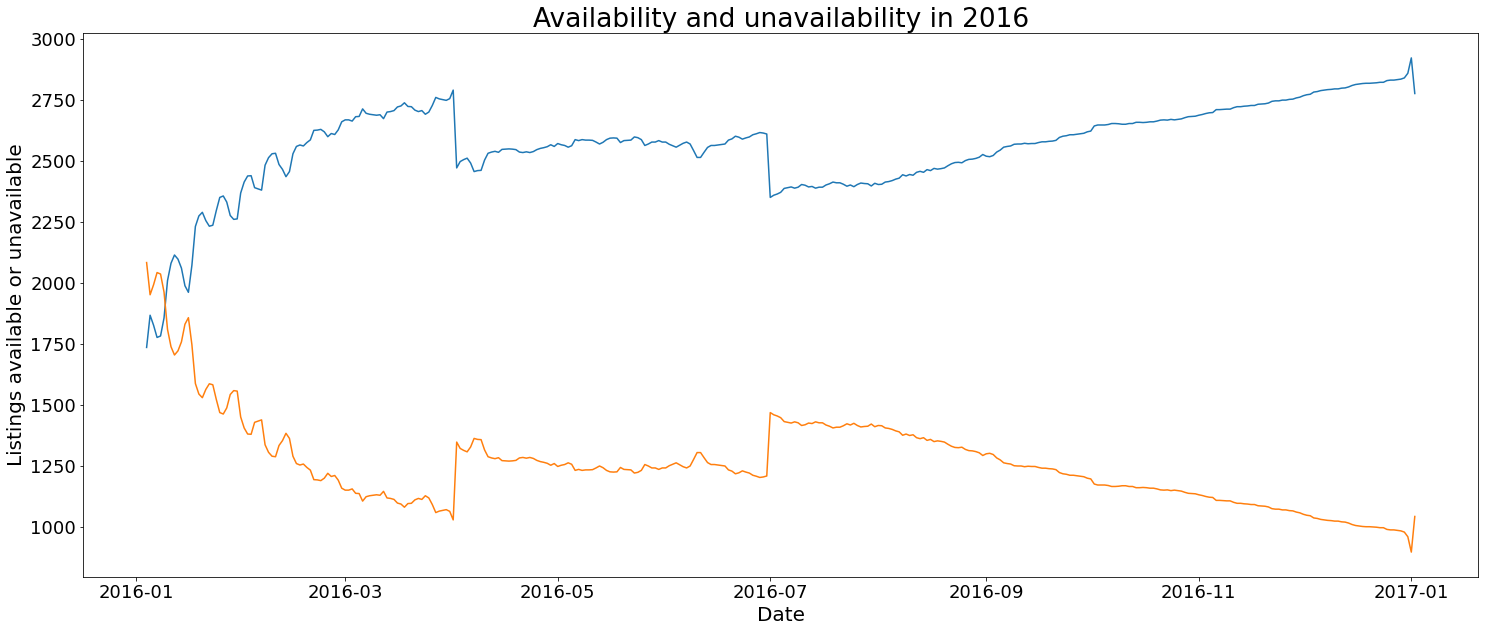

In [97]:
result_vis_multiple_series(df_calendar_available_group_1, df_calendar_unavailable_group_1, 'Availability and unavailability in 2016', 'Date', 'Listings available or unavailable')

In [26]:
# Complete unavailable series
pd.set_option('display.max_rows', 1000)
df_calendar_unavailable_group

,available,date_1
date,,
2016-01-04,2083,2016-01-04
2016-01-05,1951,2016-01-05
2016-01-06,1992,2016-01-06
2016-01-07,2042,2016-01-07
2016-01-08,2036,2016-01-08
2016-01-09,1962,2016-01-09
2016-01-10,1809,2016-01-10
2016-01-11,1738,2016-01-11
2016-01-12,1704,2016-01-12


In [46]:
# Complete available series
pd.set_option('display.max_rows', 1000)
df_calendar_available_group

,available,date_1
date,,
2016-01-04,1735,2016-01-04
2016-01-05,1867,2016-01-05
2016-01-06,1826,2016-01-06
2016-01-07,1776,2016-01-07
2016-01-08,1782,2016-01-08
2016-01-09,1856,2016-01-09
2016-01-10,2009,2016-01-10
2016-01-11,2080,2016-01-11
2016-01-12,2114,2016-01-12


In [27]:
# Partial Conclusions:
# January (in general) is a busy month
# Decreasing trend from January 1st to April 1st - Considering the levels of unavailability
# On April 2nd there is a peak of anavailability - this level continues until July 1st
# On July 1st there is another peak - The high levels continue until the end of August
# From the end of August there is a decreasing trend

# Question 2: Do the holydays influence the AirBnB availability?

# 3) Data Preparation

In [28]:
# Identifying the holidays in unavailable series

In [99]:
# Holydays in 2016

holydays = {'us_holidays_name': ['Independence Day', 'Memorial Day','Labor Day','Veterans Day','New Years Day','Christmas Day','Thanksgiving','Columbus Day'], 'date': ['2016-07-01', '2016-05-30','2016-09-05','2016-11-11','2017-01-01','2016-12-25','2016-11-24','2016-10-10']}
holydays = pd.DataFrame(data=holydays)
holydays

,us_holidays_name,date
0,Independence Day,2016-07-01
1,Memorial Day,2016-05-30
2,Labor Day,2016-09-05
3,Veterans Day,2016-11-11
4,New Years Day,2017-01-01
5,Christmas Day,2016-12-25
6,Thanksgiving,2016-11-24
7,Columbus Day,2016-10-10


In [34]:
# holydays['date'] =  pd.to_datetime(holydays['date'], format='%Y-%m-%d')

In [35]:
holydays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   us_holidays_name  8 non-null      object
 1   date              8 non-null      object
dtypes: object(2)
memory usage: 256.0+ bytes


In [100]:
df_calendar_unavailable_group.loc[df_calendar_unavailable_group['date_1'].isin(holydays['date'])]

,available,date_1
date,,
2016-05-30,1235,2016-05-30
2016-07-01,1468,2016-07-01
2016-09-05,1274,2016-09-05
2016-10-10,1168,2016-10-10
2016-11-11,1100,2016-11-11
2016-11-24,1072,2016-11-24
2016-12-25,989,2016-12-25
2017-01-01,896,2017-01-01


In [101]:
# Identifying the holidays in the unavailable series

holydays_filter = df_calendar_unavailable_group.loc[df_calendar_unavailable_group['date_1'].isin(holydays['date'])]
holydays_filter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2016-05-30 to 2017-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   available  8 non-null      int64         
 1   date_1     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


In [102]:
# Identifying the holidays in the available series

holydays_filter_av = df_calendar_available_group.loc[df_calendar_available_group['date_1'].isin(holydays['date'])]
holydays_filter_av.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2016-05-30 to 2017-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   available  8 non-null      int64         
 1   date_1     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


# 4/5) Modeling and Evaluation

# Visualizing Results

In [103]:
# Preparing the holiday data to be plotted

X = holydays_filter['date_1']
Y = holydays_filter['available']

In [104]:
# Preparing the unavailable data to be plotted

X_1 = df_calendar_unavailable_group['date_1']
Y_1 = df_calendar_unavailable_group['available']

In [106]:
# Function to visualize results in two time series - scatter and continuous line
 
def result_vis_multiple_series_scatter(series_1, X, Y, title, x_label, y_label):
    
    """ 
  Summary line. 

  Function allows the visualization of one time series. 

  Parameters: 
  series_1 (index, int): First time series variable with dates in datetime index format (independent variable) and int for dependent variables
  X (datetime): independent variable for scatter plot
  Y (int): dependent variable for scatter plot
  title (string): Title of figure
  x_label (string): Label of independent variable
  y_label (string): Label of dependent variable

  Returns: 
  Figure plot with specified parameters 
    """  
    rcParams['figure.figsize'] = 25, 10
    plt.rcParams.update({'font.size': 22})
    plt.plot(series_1)
    plt.scatter(x=X,y=Y,s=200,color='orange')
    plt.rcParams.update({'font.size': 22})
    plt.title(title)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show(True) 

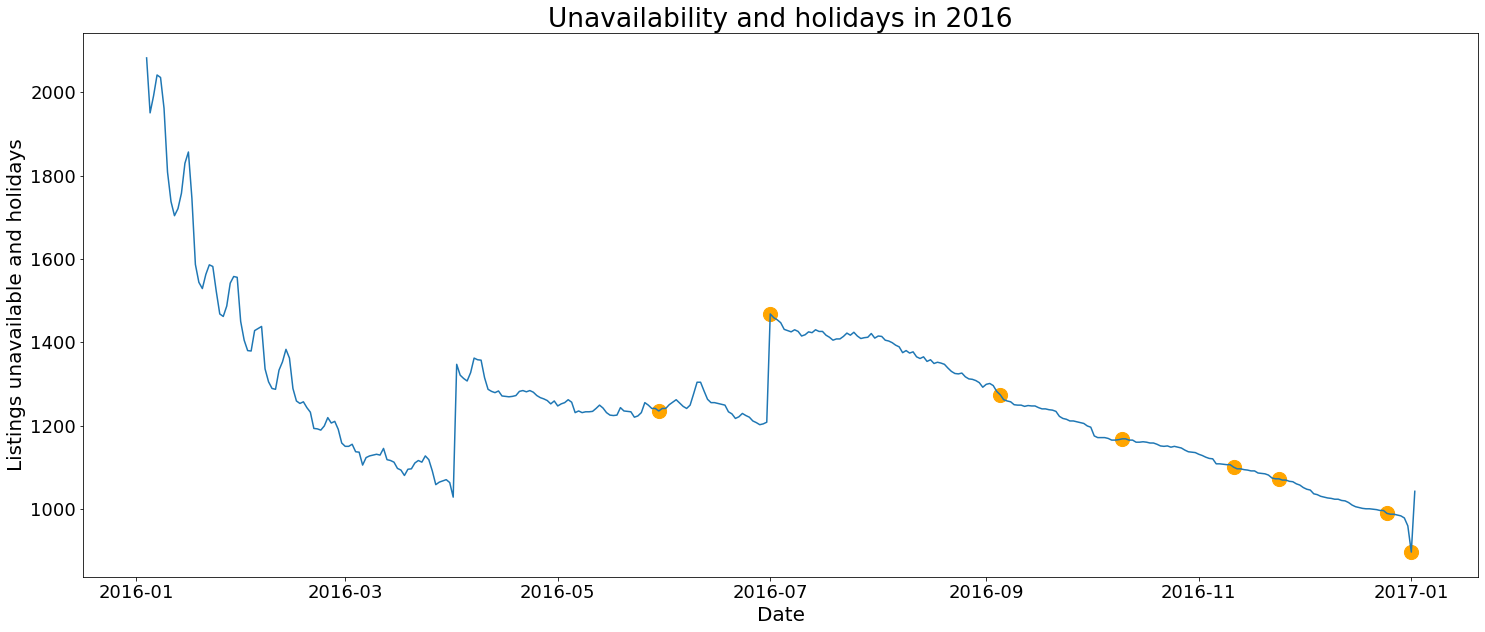

In [107]:
result_vis_multiple_series_scatter(df_calendar_unavailable_group_1, X, Y, 'Unavailability and holidays in 2016', 'Date', 'Listings unavailable and holidays')

In [108]:
# Preparing the holiday data to be plotted

X_2 = holydays_filter_av['date_1']
Y_2 = holydays_filter_av['available']

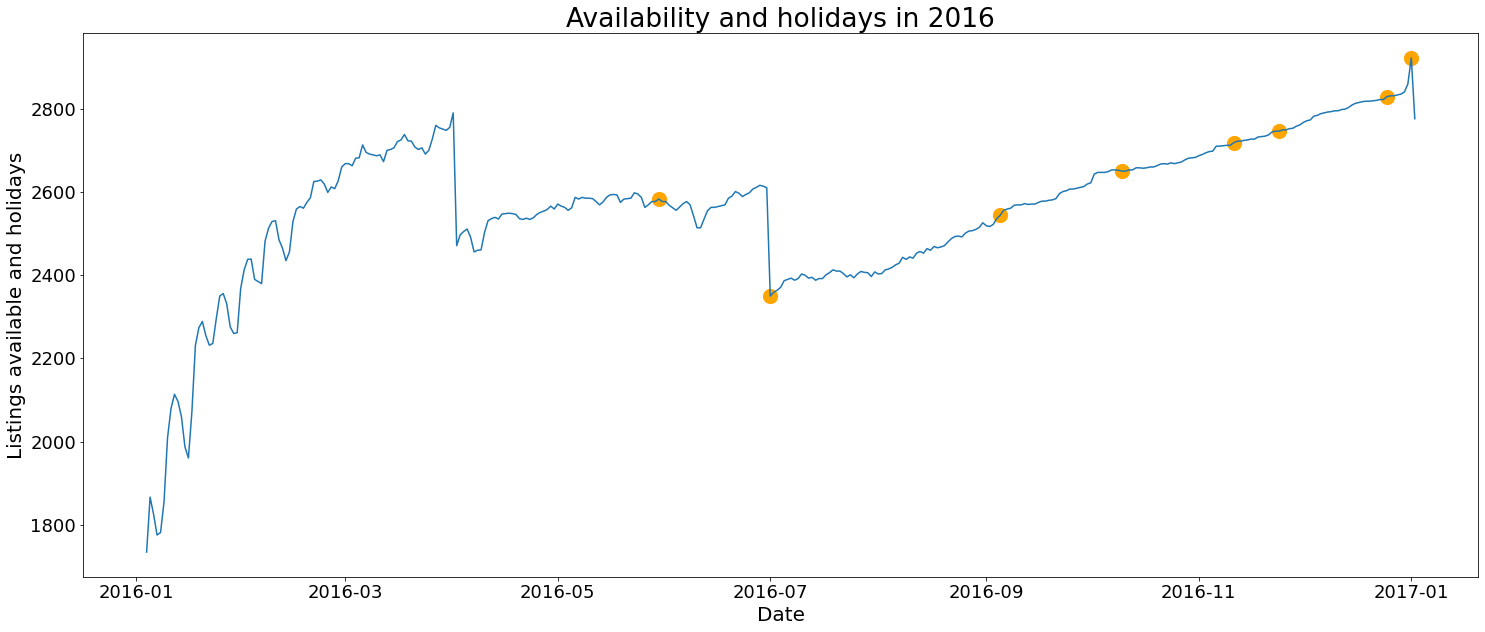

In [110]:
result_vis_multiple_series_scatter(df_calendar_available_group_1, X_2, Y_2, 'Availability and holidays in 2016', 'Date', 'Listings available and holidays')

In [46]:
# The only holyday that seems to spike occupancy is Independency Day - July 1st

# Question 3: What is the relationship between prices and availability?

# 3) Data Preparation

# Analyzing and Cleaning Data

In [158]:
# All unavailable listing_ids don´t have prices

df_calendar[df_calendar['price'].isnull()]

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


<AxesSubplot:>

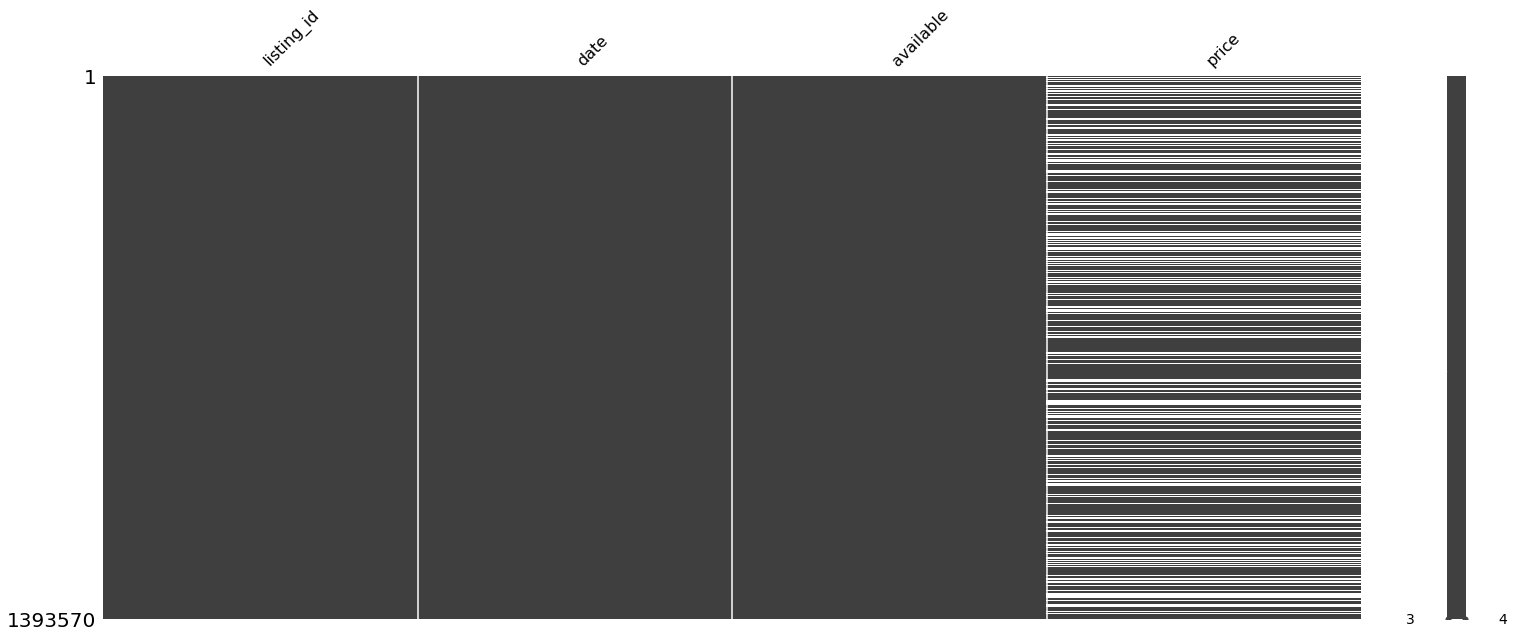

In [114]:
msno.matrix(df_calendar)

In [115]:
# Dropping rows  with missing values in price
# We need to study the relationship between prices, availability and time. Therefore, it is crucial for the observations to have price values

df_calendar_1  = df_calendar.dropna(subset=['price'], axis=0)

In [116]:
df_calendar_1.shape

(934542, 4)

In [165]:
# All available listings have prices

df_calendar_available_1 = df_calendar_1[df_calendar_1['available'] == 't']
df_calendar_available_1.shape

(934542, 4)

In [118]:
df_calendar_available.sample(10)

,date,available,price
1094714,2016-03-23,1,$220.00
96567,2016-07-29,1,$60.00
1272509,2016-05-02,1,$75.00
598185,2016-11-14,1,$142.00
1304682,2016-06-24,1,$120.00
1363296,2016-01-25,1,$100.00
1132124,2016-09-19,1,$50.00
331052,2016-12-31,1,$160.00
846505,2016-03-14,1,$62.00
1313683,2016-02-21,1,$100.00


In [225]:
df_calendar_available.head()

,date,available,price
0,2016-01-04,1,$85.00
1,2016-01-05,1,$85.00
9,2016-01-13,1,$85.00
10,2016-01-14,1,$85.00
14,2016-01-18,1,$85.00


In [254]:
def price_converter(data, label):
    
    """ 
  Summary line. 

  Function cleans the price column and converts it to float. 

  Parameters: 
  data: The dataset with the price column we want to clean and convert to float
  label (string): Label of column where the function will be based on

  Returns: 
  data_converted: Dataset with price converted 
    """  
    data['price_num_1'] = data[label].apply(lambda x: x.replace('$',''))
    data['price_num_2'] = data['price_num_1'].apply(lambda x: x.replace(',',''))
    data['price_num'] = data['price_num_2'].astype(float)
    return data

In [294]:
df_calendar_available = price_converter(data=df_calendar_available, label='price')
df_calendar_available.head()

<ipython-input-254-ac198492cefc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_num_1'] = data[label].apply(lambda x: x.replace('$',''))
<ipython-input-254-ac198492cefc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_num_2'] = data['price_num_1'].apply(lambda x: x.replace(',',''))
<ipython-input-254-ac198492cefc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,date,available,price,price_num_1,price_num_2,price_num
0,2016-01-04,1,$85.00,85.00,85.00,85.0
1,2016-01-05,1,$85.00,85.00,85.00,85.0
9,2016-01-13,1,$85.00,85.00,85.00,85.0
10,2016-01-14,1,$85.00,85.00,85.00,85.0
14,2016-01-18,1,$85.00,85.00,85.00,85.0


In [295]:
# Dropping intermediate variables

df_calendar_available.drop(['available','price','price_num_1','price_num_2'], axis=1, inplace=True)

C:\Users\crdea\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [296]:
df_calendar_available.shape

(934542, 2)

In [297]:
df_calendar_available.head()

,date,price_num
0,2016-01-04,85.0
1,2016-01-05,85.0
9,2016-01-13,85.0
10,2016-01-14,85.0
14,2016-01-18,85.0


In [298]:
df_price = grouper(data=df_calendar_available, field='date')
df_price.head()

,price_num
date,
2016-01-04,211819.0
2016-01-05,225312.0
2016-01-06,220815.0
2016-01-07,214823.0
2016-01-08,227456.0


In [130]:
df_price.shape

(365, 1)

# 4/5) Modeling and Evaluation

# Visualizing results

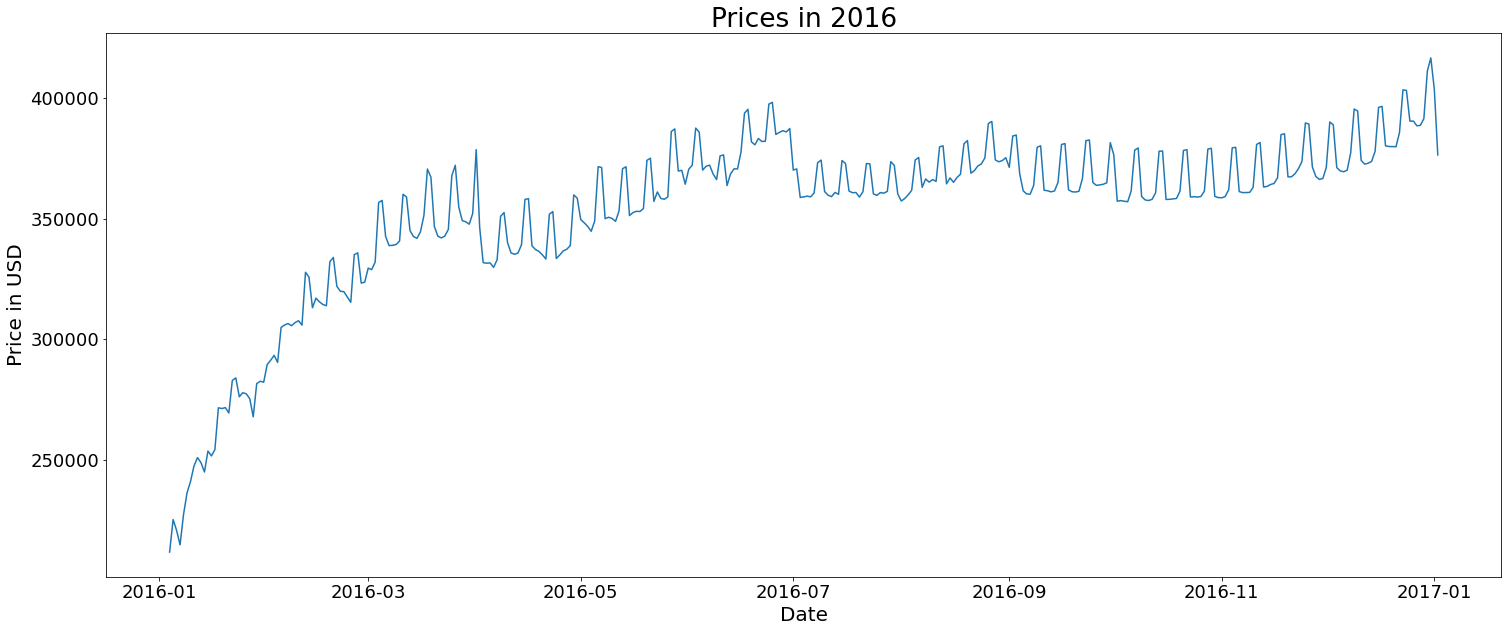

In [132]:
result_visualization(series = df_price, title='Prices in 2016', x_label='Date', y_label='Price in USD')

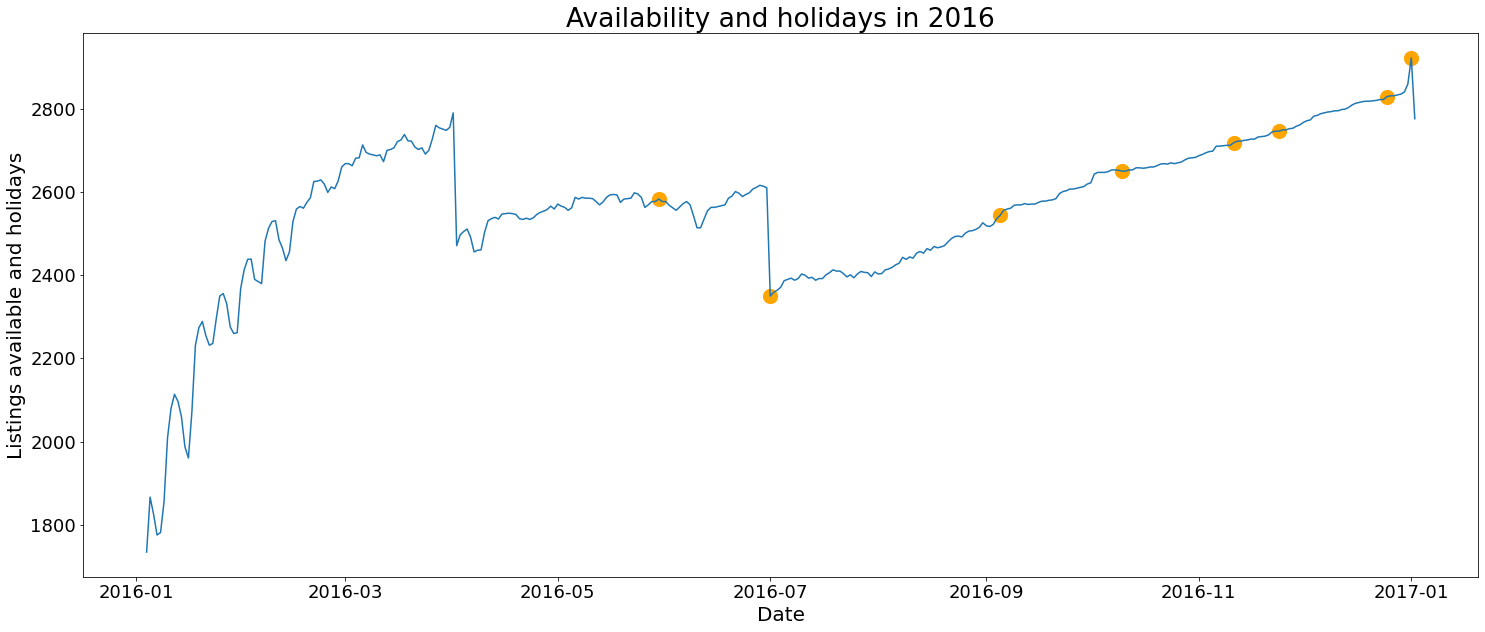

In [133]:
result_vis_multiple_series_scatter(df_calendar_available_group_1, X_2, Y_2, 'Availability and holidays in 2016', 'Date', 'Listings available and holidays')

In [ ]:
# The shapes between the curves are similar
# The similarity suggests that, as we increase availability, the prices also tend to increase

In [134]:
# On the other hand there is no close to perfect to Spearman correlation

from scipy import stats
stats.spearmanr(df_price, df_calendar_available_group_1)

SpearmanrResult(correlation=0.41377144842905145, pvalue=1.5751652327921563e-16)

# Question 4: Does the review variables influence price?

# 3) Data Preparation

In [135]:
df_listings[['number_of_reviews','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]            

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...
3813,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0
3814,2,2015-12-18,2015-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# Gathering a dataset with the variables we are interested in

df_reviews = df_listings[['number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','price']]            

In [259]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3818 non-null   int64  
 1   review_scores_rating         3171 non-null   float64
 2   review_scores_accuracy       3160 non-null   float64
 3   review_scores_cleanliness    3165 non-null   float64
 4   review_scores_checkin        3160 non-null   float64
 5   review_scores_communication  3167 non-null   float64
 6   review_scores_location       3163 non-null   float64
 7   review_scores_value          3162 non-null   float64
 8   price                        3818 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 268.6+ KB


# Analyzing and Cleaning Data

<AxesSubplot:>

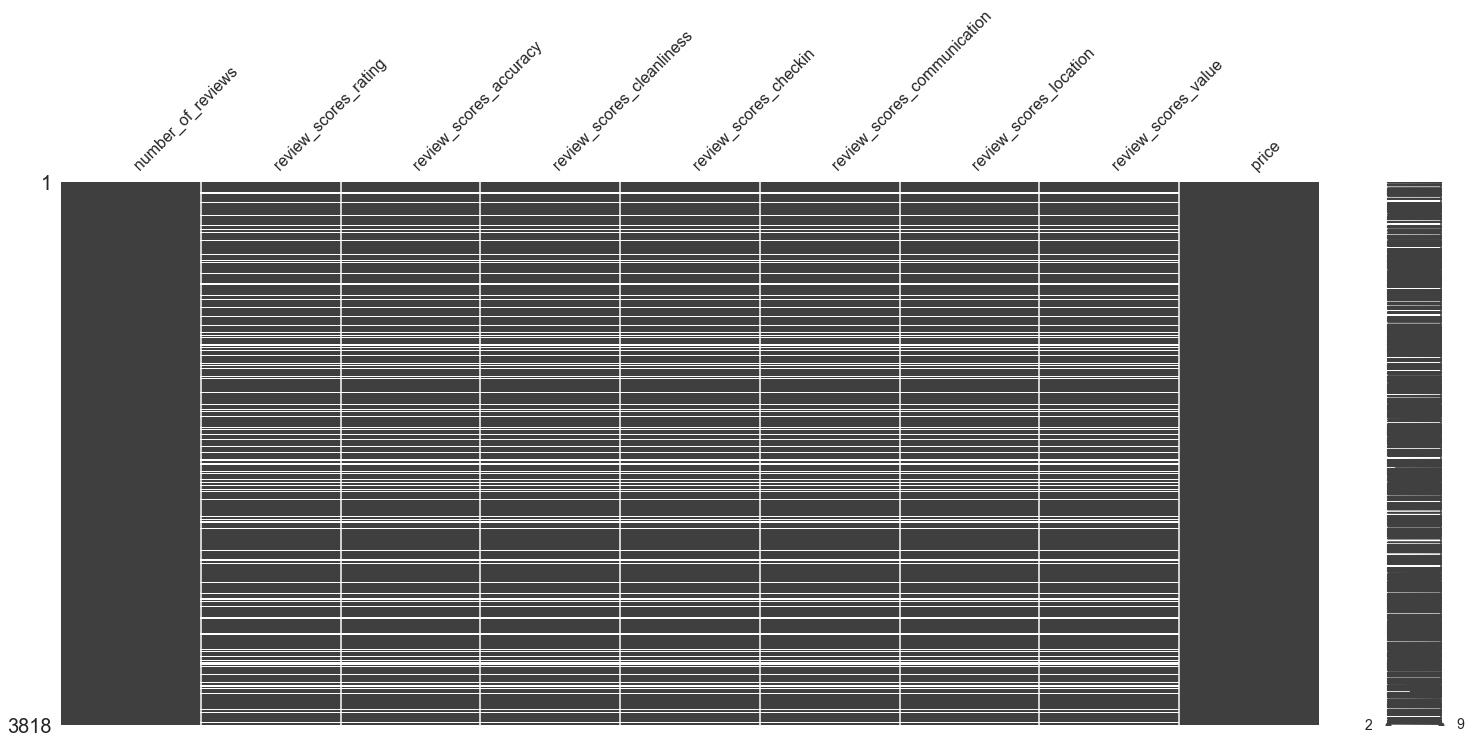

In [260]:
# Assessing missing values

msno.matrix(df_reviews)

In [261]:
# Cleaning data across columns
# To have a clear understanding of the relationship between the review variables and price it is better to drop the observations with missing values
# The input of the median or mean would affect the original distribution values of the variables

df_reviews_1 = df_reviews
for c in df_reviews_1.columns:
    df_reviews_1.dropna(subset=[c], axis=0,inplace=True) 

<ipython-input-261-479a0c54a80f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_1.dropna(subset=[c], axis=0,inplace=True)
<ipython-input-261-479a0c54a80f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_1.dropna(subset=[c], axis=0,inplace=True)
<ipython-input-261-479a0c54a80f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_1.dropna(subset=[c], axis=0,inplace=True)
<ipython-input-261-479a0c54a80f>:5

In [262]:
# Checking the results

df_reviews_1.head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00
5,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,$120.00


In [263]:
df_reviews_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3158 non-null   int64  
 1   review_scores_rating         3158 non-null   float64
 2   review_scores_accuracy       3158 non-null   float64
 3   review_scores_cleanliness    3158 non-null   float64
 4   review_scores_checkin        3158 non-null   float64
 5   review_scores_communication  3158 non-null   float64
 6   review_scores_location       3158 non-null   float64
 7   review_scores_value          3158 non-null   float64
 8   price                        3158 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 246.7+ KB


<AxesSubplot:>

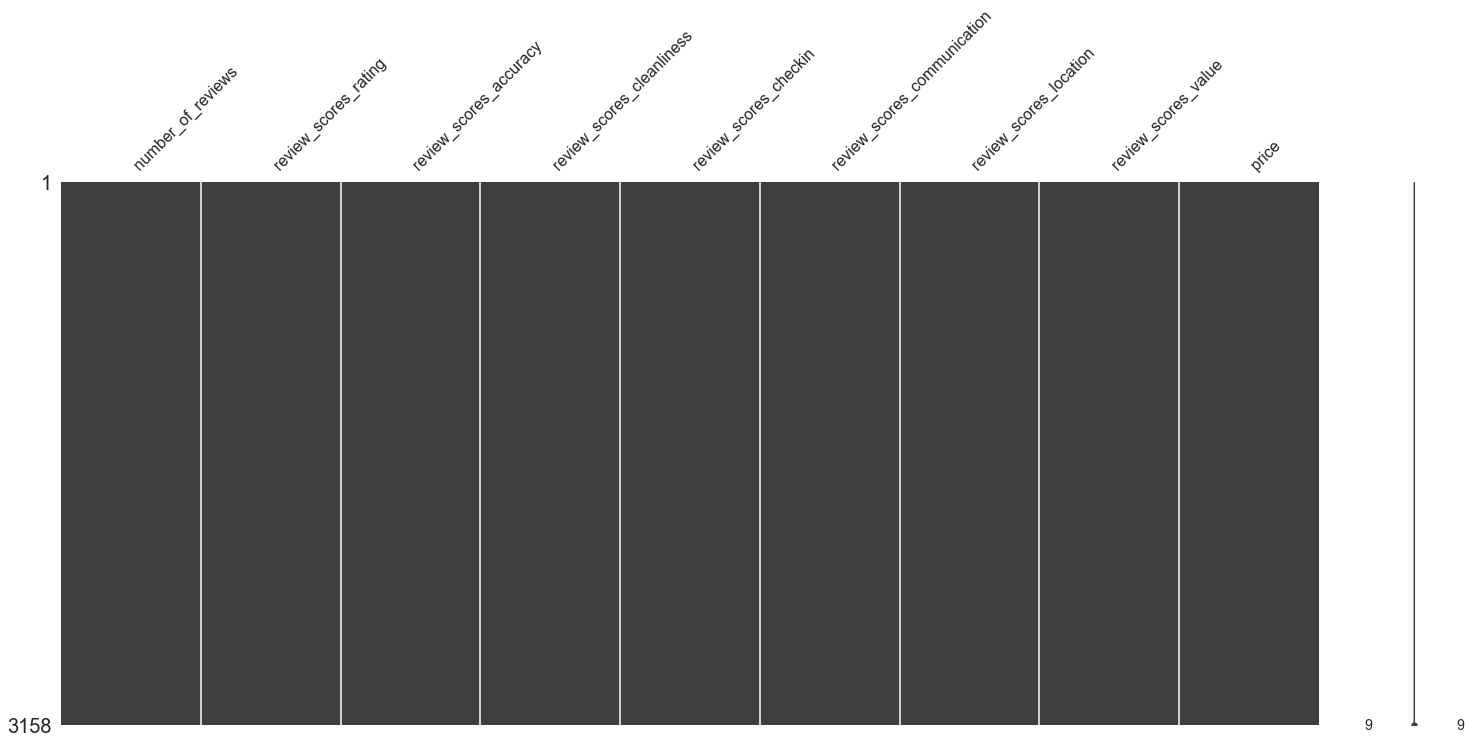

In [264]:
# Checking the results

msno.matrix(df_reviews_1)

In [265]:
# Comparing datasets before and after the data cleansing

print('Shape of data before cleaning: ', df_reviews.shape)
print('Shape of data after cleaning: ', df_reviews_1.shape)

Shape of data before cleaning:  (3158, 9)
Shape of data after cleaning:  (3158, 9)


In [267]:
df_reviews_1.head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00
5,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,$120.00


In [266]:
df_reviews_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3814
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3158 non-null   int64  
 1   review_scores_rating         3158 non-null   float64
 2   review_scores_accuracy       3158 non-null   float64
 3   review_scores_cleanliness    3158 non-null   float64
 4   review_scores_checkin        3158 non-null   float64
 5   review_scores_communication  3158 non-null   float64
 6   review_scores_location       3158 non-null   float64
 7   review_scores_value          3158 non-null   float64
 8   price                        3158 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 246.7+ KB


In [268]:
df_reviews_1 = price_converter(data=df_reviews_1, label='price')
df_reviews_1.head()

<ipython-input-254-ac198492cefc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_num_1'] = data[label].apply(lambda x: x.replace('$',''))
<ipython-input-254-ac198492cefc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_num_2'] = data['price_num_1'].apply(lambda x: x.replace(',',''))
<ipython-input-254-ac198492cefc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,price_num_1,price_num_2,price_num
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,$85.00,85.00,85.00,85.0
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,$150.00,150.00,150.00,150.0
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$975.00,975.00,975.00,975.0
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,$450.00,450.00,450.00,450.0
5,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,$120.00,120.00,120.00,120.0


In [270]:
df_reviews_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3158 non-null   int64  
 1   review_scores_rating         3158 non-null   float64
 2   review_scores_accuracy       3158 non-null   float64
 3   review_scores_cleanliness    3158 non-null   float64
 4   review_scores_checkin        3158 non-null   float64
 5   review_scores_communication  3158 non-null   float64
 6   review_scores_location       3158 non-null   float64
 7   review_scores_value          3158 non-null   float64
 8   price                        3158 non-null   object 
 9   price_num_1                  3158 non-null   object 
 10  price_num_2                  3158 non-null   object 
 11  price_num                    3158 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 320.7+ KB


In [272]:
# Dropping intermediate variables

df_reviews_1.drop(['price','price_num_1','price_num_2'],inplace=True,axis=1)

C:\Users\crdea\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# 4/5: Modeling and Evaluation

# Modeling and Visualizing

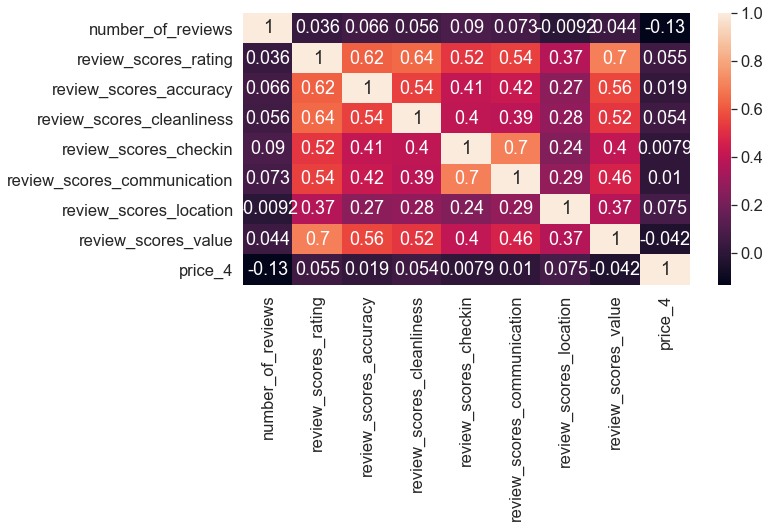

In [148]:
# Checking the correlation matrix using the Pearson correlation

sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 10, 5
corrMatrix = df_reviews_1.corr(method = 'pearson')
sns.heatmap(corrMatrix, annot=True)
plt.show()

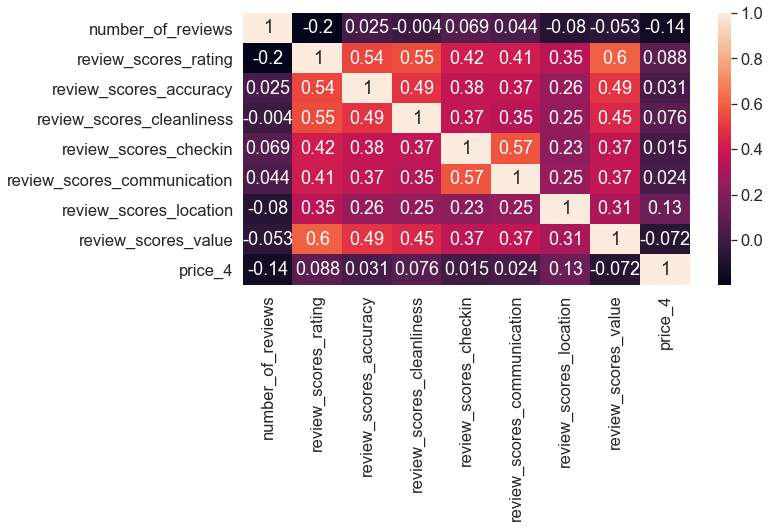

In [149]:
# Checking the correlation matrix using the Spearman correlation

sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 10, 5
corrMatrix = df_reviews_1.corr(method = 'spearman')
sns.heatmap(corrMatrix, annot=True)
plt.show()